<a href="https://colab.research.google.com/github/Abdullah2020/DeepRacer-Student-League-Track-Waypoints-Visualization/blob/master/Track_Waypoints_display.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Track Waypoints Visualization**

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

print("Setup Completed...!!!")

Setup Completed...!!!


In [3]:
!git clone https://github.com/aws-deepracer-community/deepracer-race-data.git

Cloning into 'deepracer-race-data'...
remote: Enumerating objects: 482247, done.
remote: Counting objects: 100% (15723/15723), done.
remote: Compressing objects: 100% (4328/4328), done.
remote: Total 482247 (delta 11743), reused 15125 (delta 11304), pack-reused 466524 (from 1)
Receiving objects: 100% (482247/482247), 274.44 MiB | 23.44 MiB/s, done.
Resolving deltas: 100% (355619/355619), done.
Updating files: 100% (41189/41189), done.


In [4]:
def track_display(npy_name, index_interval=5, index_fontsize=10):
    """
    Function to visualize track waypoints from a .npy file.

    Args:
        npy_name (str): The name of the .npy file containing track waypoints.
        index_interval (int): Interval for showing waypoint indices. Default is 5.
        index_fontsize (int): Font size for waypoint index labels. Default is 10.

    Outputs:
        A plot showing the track center, left, and right boundaries,
        along with waypoint indices at the specified interval.
    """

    # Define the folder path containing the .npy track files
    npy_folder_path = "deepracer-race-data/raw_data/tracks/npy"

    # Construct the full path to the .npy file
    numpy_file_path = os.path.join(npy_folder_path, npy_name)

    # Load the track data from the .npy file
    track_arr = np.load(numpy_file_path)

    # Extract track waypoints:
    # track_C - center points,
    # track_L - left boundary points,
    # track_R - right boundary points
    track_C = track_arr[:, [0, 1]]  # Center coordinate of the track
    track_L = track_arr[:, [2, 3]]  # Left coordinate of the track
    track_R = track_arr[:, [4, 5]]  # Right coordinate of the track

    # Get the width and height of the track for proper aspect ratio in the plot
    w = track_C[:, 0].max() - track_C[:, 0].min()
    h = track_C[:, 1].max() - track_C[:, 1].min()

    # Create a figure with adjusted aspect ratio
    plt.figure(figsize=(10, 10 * (h/w)))

    # Scatter plot for center waypoints
    plt.scatter(track_C[:, 0], track_C[:, 1], s=15)

    # Plot left and right track boundaries in gray
    plt.plot(track_L[:, 0], track_L[:, 1], c='gray')
    plt.plot(track_R[:, 0], track_R[:, 1], c='gray')

    # Loop through center waypoints to display index labels at specified intervals
    for i, (x, y) in enumerate(track_C):
        if i % index_interval == 0:  # Display index every 'index_interval' points
            plt.text(x + 0.1, y, i, fontsize=index_fontsize)

    # Add a title with the file name
    plt.title(npy_name)

    # Automatically generate the image filename based on the track name (npy_name)
    image_filename = f"{os.path.splitext(npy_name)[0]}_track.png"

    # Save the output figure as a .png file with high resolution
    plt.savefig(image_filename, dpi=300)

    # Display the plot
    plt.show()


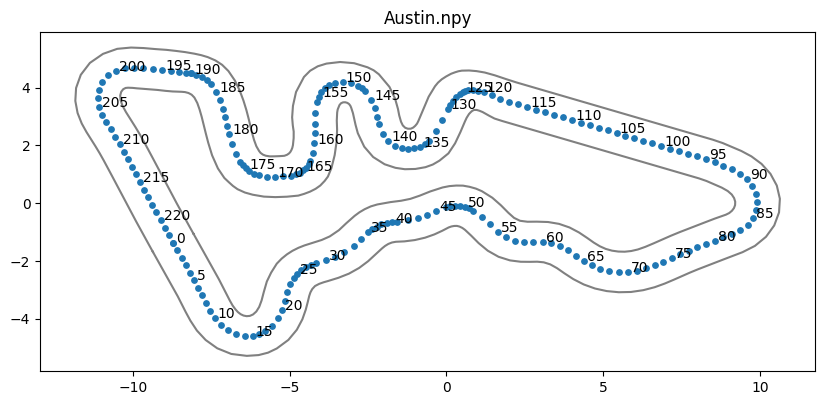

In [5]:
track_display(
    npy_name = "Austin.npy",   # Name of the numpy file containing the track waypoints
    index_interval = 5,     # Interval between the indices of the waypoints
    index_fontsize = 10,    # Font size of the waypoint indices
)
